<table>
    <tr>
        <td><img src="" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Proyecto  </p> Métodos de Clasificación </FONT>         </h1></td>         
        
   
</table>

# <FONT SIZE=5 COLOR="purple"> **Caso de estudio: Cellphone Price Range** </FONT>

En este estudio de caso se espera que el estudiante:

- EDA.

- Classification.

- Evaluation.


In [1]:
## Librerías para datos
import pandas                 as pd
import numpy                  as np

# Librería de gráficos
import matplotlib.pyplot      as plt
import seaborn                as sns
import plotly.express         as px
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

# Preprocesado y conjunto de entrenamiento y prueba (split)
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing    import MinMaxScaler
from sklearn.preprocessing    import StandardScaler

# Para
from sklearn                  import metrics
from sklearn.metrics          import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics          import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics          import roc_curve, auc, accuracy_score,roc_auc_score


# Para los modelos de machine learning
from sklearn.linear_model     import LogisticRegression
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier
from sklearn.neighbors        import KNeighborsClassifier


# Para graficar los árbolitos
from sklearn.tree             import export_graphviz

# Para la selección de características
from sklearn.feature_selection import RFE

# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")


# Data introduction

In [2]:
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/mobile_price.csv"
datos= pd.read_csv(url)
datos.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# EDA

In [ ]:
datos.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

- ***Id***: ID
- ***Battery_Power***: Total energy a battery can store in one time measured in mAh
- ***Blue***: Has bluethoot or not
- ***Clock_speed***: speed at which microprocessor executes instructions
- ***dual_sim***: Has dual sim support or not
- ***fc***: Front camera megapixels
- ***int_memory***: Internal Memory in Gigabytes
- ***m_dep***: Mobile Depth in cm
- ***mobile_wt***: Mobile weigth
- ***ram***: Ram memory in Megabytes
- ***wifi***: Has wifi or not
- ***price_range***: Price range
- ***n_cores***: Number of cores in the microprocessor
- ***touch_screen***: Has touchscreen or not
- ***Talk_time***: Calling time linked to battery duration
- ***Three_g***: has 3g or not
- ***Four_g***: has 4g or not




In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Podemos ver que solo existen datos de tipo int y float en el dataset, representando valoren cuantitativos como cualitativos, tenemos 20 variables las cuales detallamos anteriormente, las cuales no presentan valores nulos.

In [ ]:
datos.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
datos.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
px.bar(datos.price_range.value_counts())

In [ ]:
px.bar(datos.int_memory.value_counts())

In [ ]:
px.bar(datos.n_cores.value_counts())

In [ ]:
px.histogram(datos.battery_power)

In [ ]:
px.box(datos.clock_speed,
       color = datos.price_range)

In [ ]:
px.box(datos.int_memory,
       color = datos.price_range)

In [3]:
px.box(datos.talk_time,
       color=datos.price_range
)

# Datos Faltantes

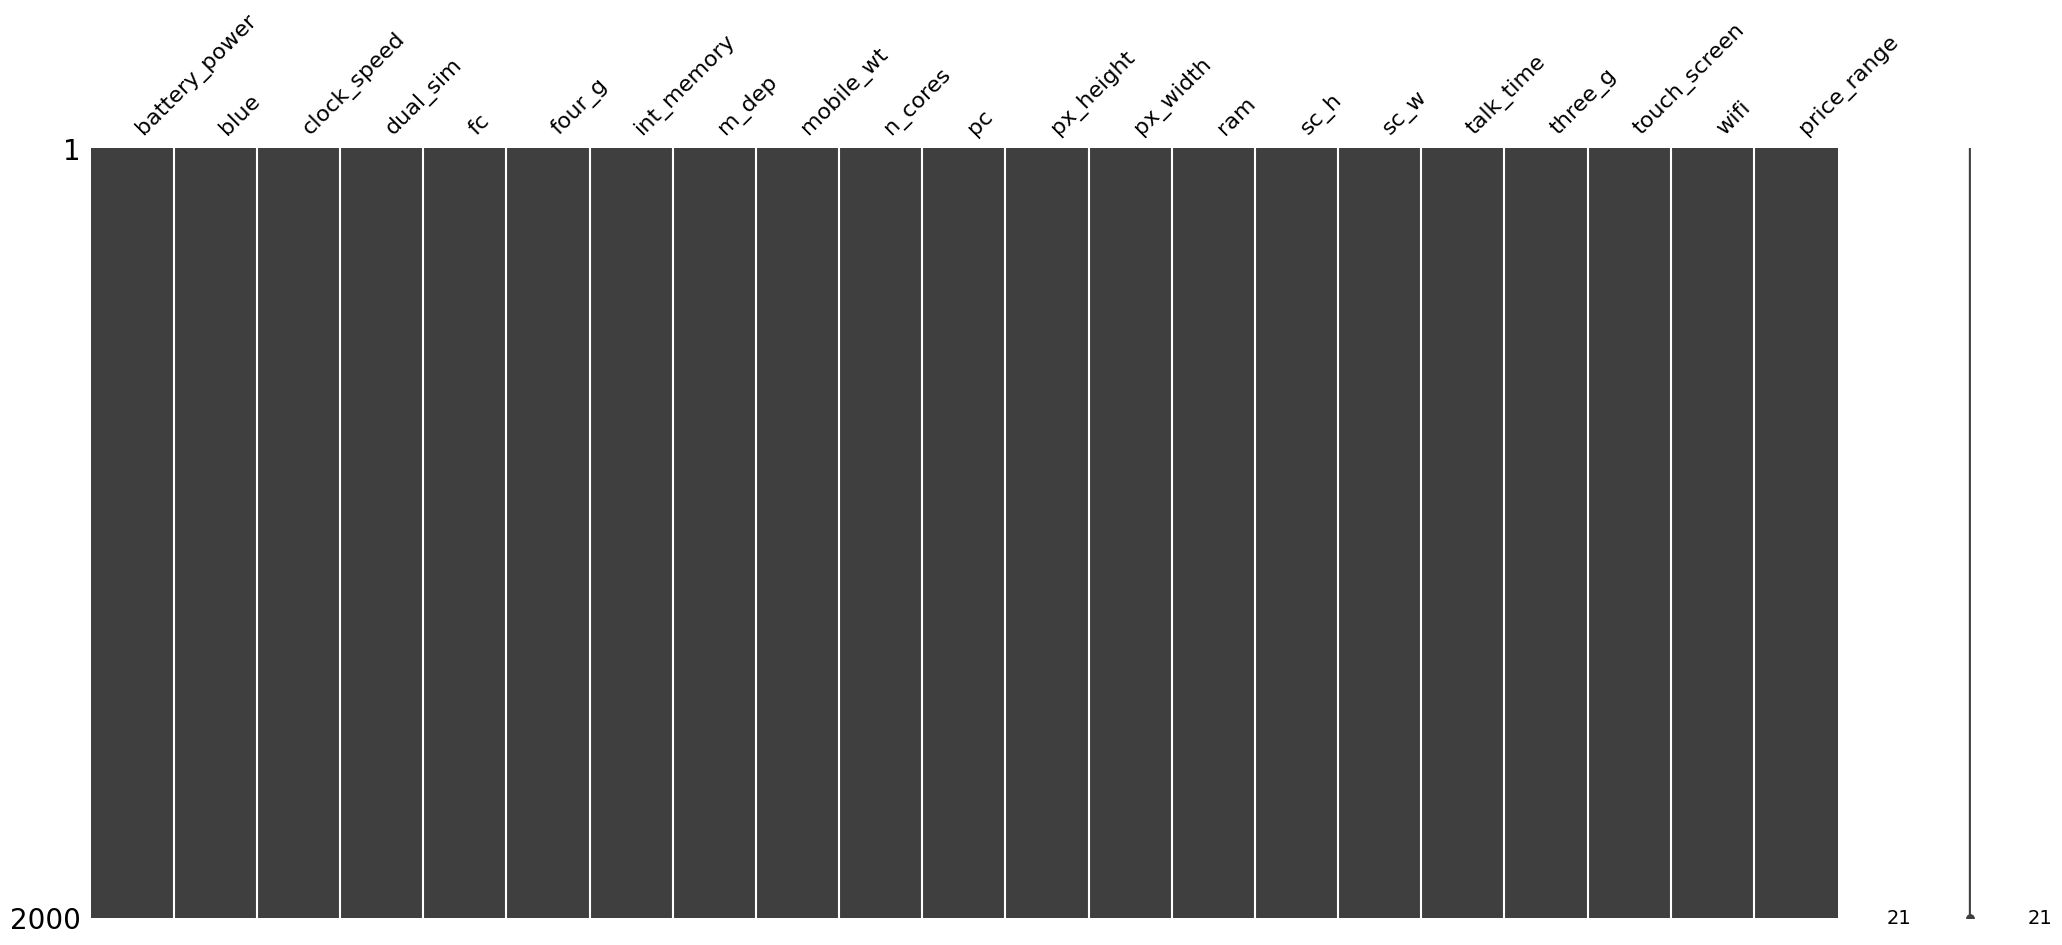

In [ ]:
import missingno as msno
msno.matrix(datos)
plt.show()

Esta libreria nos permite crear visualizaciones que representan los datos que estamos trabajando, haciendo mas facil identificar datos faltantes y su ubicacion en el dataset.

#Revision de variables con datos irregulares

In [ ]:
px.bar(datos.px_height.value_counts())



In [ ]:
conteo=(datos.px_height==0)
conteo.sum()



2

In [4]:
#datos.px_height=datos.px_height.replace({datos.px_height.median():0},inplace=True)
datos.loc[datos["px_height"]==0,"px_height"]=datos.px_height.mean()
conteo=(datos.px_height==0)
conteo.sum()


0

Se tenian dos valores iguales a cero, por lo cual se reemplazan por la media de la variable, se realiza utilizando loc de pandas.

# Reestructuramos la variable price range para realizar predicciones teniendola como output
0 - low cost
1 - medium cost
2 - high cost
3 - very high cost

In [ ]:
a=datos.price_range.value_counts()
lista=["medium cost","high cost","very high cost","low cost"]
a=pd.Series.to_frame(a)
a['cost']=lista
a


,count,cost
price_range,,
1,500,medium cost
2,500,high cost
3,500,very high cost
0,500,low cost


In [ ]:
px.histogram(a,x='cost',y='count')

In [ ]:
datos.loc[datos["price_range"]==1 ,"price_range"]=0
datos.loc[datos["price_range"]==2 ,"price_range"]=1
datos.loc[datos["price_range"]==3,"price_range"]=1
datos.price_range

0       0
1       1
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    1
1998    0
1999    1
Name: price_range, Length: 2000, dtype: int64

In [ ]:
px.bar(datos.price_range.value_counts())

# <FONT SIZE=5 COLOR="green"> **Clasificación** </FONT>

1. Para **KNN**

   a. Aplicamos el modelo.

   b. Evaluamos el modelo. Matriz de confusión

   c. Graficamos la curva ROC y el valor AUC

2. Para **Regresión Logística**

   a. Aplicamos el modelo.
   
   b. Evaluamos usando matriz de confusión.
   
   c. Gráficamos la curva ROC y calculamos el valor AUC

   d. Variamos el umbral para buscar mejor resultado
   
3. Para **Árboles de Decisión**

   a. Aplicamos el modelo

   b. Evaluamos usando matriz de confusión.

   c. Intentamos mejorar el modelo optimizando hiperparámetros.

   d. Utilizamos el método de la poda con el valor *ccp* para tratar de mejorar el modelo.


# Punto 2.1. Solución

# PUNTO A

In [ ]:
# Dividir en dos conjuntos
# las variables predictoras
X = datos.drop("price_range", axis=1)
# la variable objetivo
y = datos.price_range
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.3)          # tamaño del conjunto de prueba

In [ ]:
print("El tamaño de X_train es {}".format(X_train.shape))
print("El tamaño de y_train es: {}".format(y_train.shape))
print("El tamaño de X_test es {}".format(X_test.shape))
print("El tamaño de y_test es: {}".format(y_test.shape))

El tamaño de X_train es (1400, 20)
El tamaño de y_train es: (1400,)
El tamaño de X_test es (600, 20)
El tamaño de y_test es: (600,)


In [ ]:
X_train.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1719,833,1,0.6,1,0,1,27,0.3,145,4,2,649,1290,586,19,8,19,1,0,1
1702,1424,1,2.9,1,0,0,20,0.6,180,5,0,181,1199,2658,15,0,19,1,0,0
1287,860,1,1.3,1,1,1,49,0.7,141,6,13,692,979,3869,16,14,20,1,1,1
482,1330,1,1.3,1,14,0,3,0.3,83,5,17,980,1262,463,14,6,11,0,0,1
768,1149,1,2.2,0,4,0,30,0.2,106,6,5,1617,1675,3755,17,14,8,1,0,0


In [ ]:
# definimos el escalados
escalar = StandardScaler()
# lo aplicamos a los conjuntos
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 29,              # número de vecinos k=10
                           metric = 'manhattan')          # métrica euclideana
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=29)

In [ ]:
y_pred = KNN.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

# PUNTO B

Text(0.5, 23.52222222222222, 'Predicciones')

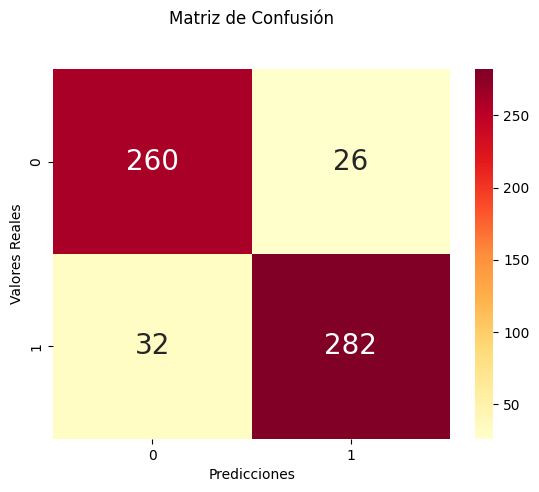

In [ ]:
MC= metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       286
           1       0.92      0.90      0.91       314

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



# PUNTO C

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validacion = KFold(10)                               # divide los datos en 10 pliegues.
resultados = cross_val_score(KNN,                          # modelo aplicado
                             X,                            # conjunto de predictores
                             y,                            # variable de respuesta
                             cv = kfold_validacion,        # número de divisiones en cross-validation.
                             scoring = "accuracy")         # se puede escoger la métrica.
print(resultados)                                          # para ver la variable resultados.
resultados.mean()


[0.965 0.985 0.975 0.985 0.975 0.965 0.98  0.955 0.97  0.965]


0.9720000000000001

In [ ]:
from sklearn.model_selection import GridSearchCV

# definimos los parámetros que vamos a combinar. Diccionario
grid_params = {"n_neighbors" : list(range(1, 31)),         # se recorre la lista en k
               "weights" : ["uniform","distance"],         # se establecen los pesos
               "metric" : ["euclidean","manhattan"]}       # se establecen las métricas

# hacemos la búsqueda en grilla con 5-folds
Grid_Search = GridSearchCV(KNN,                            # el modelo aplicado
                  grid_params,                             # los parámetros que van a variar
                  cv = 5,                                  # el número de folds
                  verbose = 3)                             # para que imprima resultados. Posibilidades: 1,2 o 3
# Entrenar el modelo obtenido arriba
g_res = Grid_Search.fit(X_train,y_train)

In [ ]:
print("Mejor score: ",g_res.best_score_)

Mejor score:  0.9135714285714286


In [ ]:
print("Mejores hiperparámetros", g_res.best_params_)

Mejores hiperparámetros {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}


In [ ]:
auc_KNN = roc_auc_score(y_train, KNN.predict(X_train))
auc_KNN

0.9203538558280455

In [ ]:
# calculamos la tasa de falsos positivos y verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_train, KNN.predict_proba(X_train)[:,1])
# los coloco como un DataFrame
df=pd.DataFrame(np.transpose(np.array([fpr, tpr,thresholds])), columns = ["FPR", "TPR", "Umbrales"])
df.head(10)

,FPR,TPR,Umbrales
0,0.000000,0.000000,1.965517
1,0.000000,0.002915,0.965517
2,0.000000,0.023324,0.896552
3,0.000000,0.061224,0.862069
4,0.000000,0.110787,0.827586
5,0.000000,0.183673,0.793103
6,0.000000,0.282799,0.758621
7,0.000000,0.396501,0.724138
8,0.001401,0.495627,0.689655
9,0.001401,0.594752,0.655172


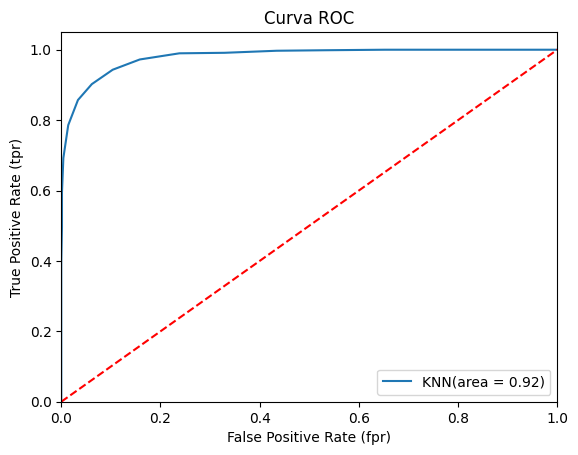

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, KNN.predict_proba(X_train)[:,1])

# detalles de la gráfica
plt.figure()
plt.plot(fpr, tpr, label='KNN(area = %0.2f)' % auc_KNN)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
umbral=pd.DataFrame(np.transpose(np.round(roc_curve(y_train, KNN.predict_proba(X_train)[:,1]),3)),
                        columns=["FPR", "TPR", "Umbral"])
## Distancia euclidiana al punto ideal
umbral["Distancia"]=np.sqrt(umbral["FPR"]**2 +(1-umbral["TPR"])**2)
umbral.sort_values("Distancia").head(4)

,FPR,TPR,Umbral,Distancia
13,0.062,0.902,0.517,0.115966
14,0.104,0.943,0.483,0.118596
12,0.034,0.857,0.552,0.146986
15,0.158,0.972,0.448,0.160462


In [ ]:
# calculamos de nuevo las predicciones con este umbral
umbral2=0.517
# en los datos de entrenamiento
y_pred_train2= np.where(KNN.predict_proba(X_train)[:,1] > umbral2, 1, 0)
print("En los datos de entrenamiento\n",classification_report(y_train, y_pred_train2))

# en los datos de prueba
y_pred_test2= np.where(KNN.predict_proba(X_test)[:,1] > umbral2, 1, 0)
print("En los datos de prueba \n",classification_report(y_test, y_pred_test2))


En los datos de entrenamiento
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       714
           1       0.93      0.90      0.92       686

    accuracy                           0.92      1400
   macro avg       0.92      0.92      0.92      1400
weighted avg       0.92      0.92      0.92      1400

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       286
           1       0.92      0.90      0.91       314

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



# Punto 2.2

# PUNTO A

In [ ]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# hacemos las predicciones en el conjunto de test.
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

PUNTO B

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       286
           1       0.99      0.99      0.99       314

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



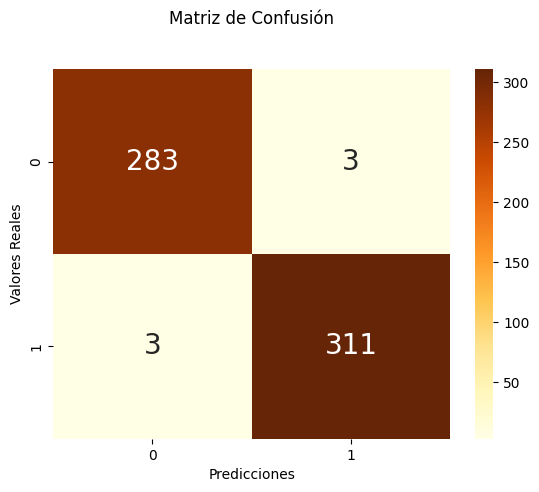

In [ ]:

from sklearn.model_selection import GridSearchCV
# calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                      # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
print(classification_report(y_test,y_pred))

# PUNTO C

In [ ]:
log_roc_auc = roc_auc_score(y_train, log_reg.predict(X_train))
log_roc_auc

0.9920968387354943

In [ ]:
# calculamos la tasa de falsos positivos y verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_train, log_reg.predict_proba(X_train)[:,1])
# los coloco como un DataFrame
df=pd.DataFrame(np.transpose(np.array([fpr, tpr,thresholds])), columns = ["FPR", "TPR", "Umbrales"])
df.head(10)

,FPR,TPR,Umbrales
0,0.000000,0.000000,2.000000
1,0.000000,0.001458,1.000000
2,0.000000,0.978134,0.561526
3,0.001401,0.978134,0.559271
4,0.001401,0.981050,0.550313
5,0.002801,0.981050,0.529539
6,0.002801,0.985423,0.521209
7,0.004202,0.985423,0.519282
8,0.004202,0.988338,0.510023
9,0.005602,0.988338,0.508398


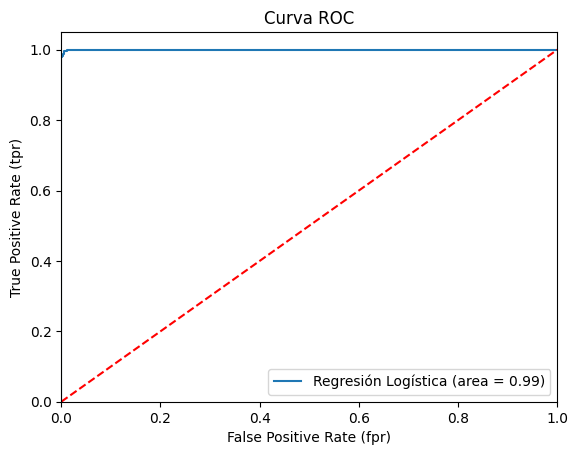

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, log_reg.predict_proba(X_train)[:,1])

# detalles de la gráfica
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# PUNTO D

In [ ]:
umbral=pd.DataFrame(np.transpose(np.round(roc_curve(y_train, log_reg.predict_proba(X_train)[:,1]),3)),
                        columns=["FPR", "TPR", "Umbral"])
## Distancia euclidiana al punto ideal
umbral["Distancia"]=np.sqrt(umbral["FPR"]**2 +(1-umbral["TPR"])**2)
umbral.sort_values("Distancia").head(4)

,FPR,TPR,Umbral,Distancia
10,0.006,0.997,0.484,0.006708
12,0.011,0.999,0.438,0.011045
11,0.011,0.997,0.449,0.011402
8,0.004,0.988,0.510,0.012649


In [ ]:
umbral2=0.484
# en los datos de entrenamiento
y_pred_train2= np.where(log_reg.predict_proba(X_train)[:,1] > umbral2, 1, 0)
print("En los datos de entrenamiento\n",classification_report(y_train, y_pred_train2))

# en los datos de prueba
y_pred_test2= np.where(log_reg.predict_proba(X_test)[:,1] > umbral2, 1, 0)
print("En los datos de prueba \n",classification_report(y_test, y_pred_test2))


En los datos de entrenamiento
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       714
           1       0.99      1.00      0.99       686

    accuracy                           0.99      1400
   macro avg       0.99      1.00      0.99      1400
weighted avg       1.00      0.99      1.00      1400

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       286
           1       0.98      0.99      0.99       314

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



Logramos obtener una mejora menor al 1% por lo cual no cambia de manera significativa el desempeño de nuestro modelo.

# Punto 2.3 Solución



PUNTO A

In [ ]:
model1_Tree = DecisionTreeClassifier(max_depth = 6,           # Profundidad del árbol
                                     criterion = "gini",      # Función de costo.
                                     random_state = 123       # Semilla
                                     )

model1_Tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

Profundidad del árbol: 6
Número de nodos terminales: 38


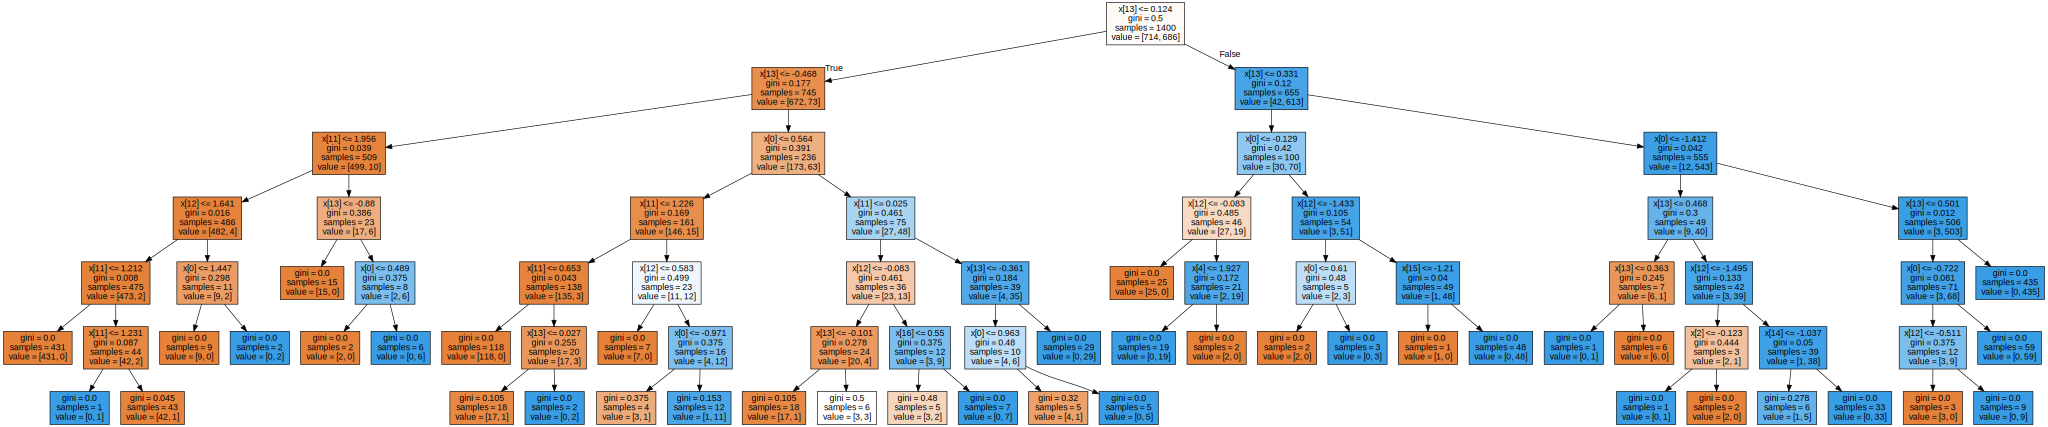

In [ ]:
print(f"Profundidad del árbol: {model1_Tree.get_depth()}")
print(f"Número de nodos terminales: {model1_Tree.get_n_leaves()}")
# Generamos el árbol
dot_data = export_graphviz(model1_Tree,                                 # modelo
                           feature_names = None,                        # columnas de entrenamiento
                           filled=True,)                                # colores del árbol (relleno)
Source(dot_data, format="png")

In [ ]:
y_predict = model1_Tree.predict(X_test)
y_predict

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,

# PUNTO B

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       286
           1       0.97      0.93      0.95       314

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



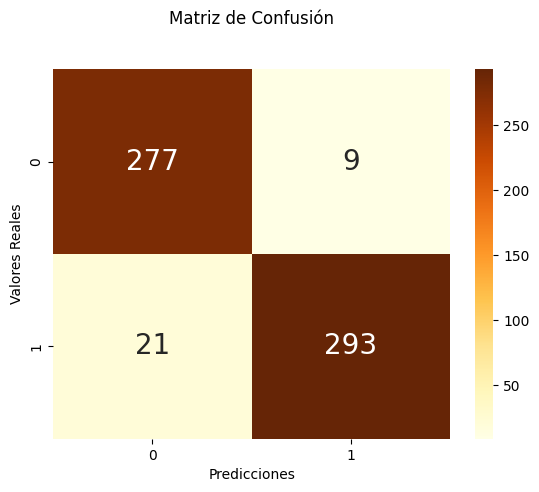

In [ ]:
# calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_predict)
p = sns.heatmap(pd.DataFrame(cm),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                      # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
print(classification_report(y_test,y_predict))

Tenemos un resultado de 95% en accuracy con un valor de 97% en Recall, lo cual nos indica que el modelo genera clasificaciones acertadas.

PUNTO C

In [ ]:
# Validacion cruzada para obtener la profundidad óptima
parameters = {"max_depth" : range(4,20),                  # probar desde 3 hasta 20
              "min_samples_split":[5,10,20,100]}

arbol_g= GridSearchCV(DecisionTreeClassifier(random_state=123),
                      param_grid = parameters,
                      scoring="precision",  ## Metrica BAcc
                      n_jobs=-1)
arbol_g.fit(X=X_train,
            y=y_train)

# el mejor modelo
print (arbol_g.best_score_, arbol_g.best_params_)

0.9452150777386548 {'max_depth': 6, 'min_samples_split': 10}


Mediante la variacion de hiperparametros encontramos que la profundidad maxima optima es de 6, acompañada de una division de muestras de 10. Esta configuracion nos permite llegar a un accuracy de 94,52%.

In [ ]:
clf = DecisionTreeClassifier(random_state = 123)

# utilizamos la función clf.cost_complexity_pruning_path
path  = clf.cost_complexity_pruning_path(X_train,
                                         y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# imprimimos los alphas
print(ccp_alphas)

[0.         0.0006746  0.00069597 0.00069767 0.00072488 0.00095238
 0.00107143 0.00114286 0.00122449 0.00130952 0.00134921 0.00134921
 0.00141107 0.0014201  0.00142167 0.00160714 0.00163527 0.00170635
 0.00190476 0.00199267 0.00214286 0.00258503 0.00309747 0.00365391
 0.00388889 0.00391304 0.00704082 0.00769243 0.01091594 0.01797211
 0.34958021]


In [ ]:
# generamos los modelos con estos alphas
clfs = []
accuracyTrain=[]
accuracyTest=[]

for ccp_alpha in ccp_alphas:
    # generar el modelo
    clf = DecisionTreeClassifier(random_state=123,ccp_alpha=ccp_alpha)
    # entrenar el modelo
    clf.fit(X_train,y_train)
    # predict de train y test
    predTrain = clf.predict(X_train)
    predTest  = clf.predict(X_test)
    # rendimiento de los modelos
    accuracyTrain.append(accuracy_score(y_train,predTrain))
    accuracyTest.append(accuracy_score(y_test,predTest))
    # guarda los modelos
    clfs.append(clf)
print(" El número de nodos en el último árbol es : {} con ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]))



 El número de nodos en el último árbol es : 1 con ccp_alpha: 0.3495802141503151


In [ ]:
print(ccp_alphas)
print(accuracyTrain)
print(accuracyTest)

[0.         0.0006746  0.00069597 0.00069767 0.00072488 0.00095238
 0.00107143 0.00114286 0.00122449 0.00130952 0.00134921 0.00134921
 0.00141107 0.0014201  0.00142167 0.00160714 0.00163527 0.00170635
 0.00190476 0.00199267 0.00214286 0.00258503 0.00309747 0.00365391
 0.00388889 0.00391304 0.00704082 0.00769243 0.01091594 0.01797211
 0.34958021]
[1.0, 0.9992857142857143, 0.9985714285714286, 0.9978571428571429, 0.9971428571428571, 0.9964285714285714, 0.9957142857142857, 0.995, 0.9942857142857143, 0.9935714285714285, 0.9914285714285714, 0.9907142857142858, 0.9892857142857143, 0.9871428571428571, 0.9857142857142858, 0.9835714285714285, 0.9828571428571429, 0.9807142857142858, 0.9792857142857143, 0.9771428571428571, 0.9757142857142858, 0.9742857142857143, 0.9714285714285714, 0.9678571428571429, 0.9635714285714285, 0.9585714285714285, 0.9578571428571429, 0.9507142857142857, 0.9328571428571428, 0.9178571428571428, 0.51]
[0.9466666666666667, 0.9483333333333334, 0.95, 0.95, 0.95, 0.95, 0.948333

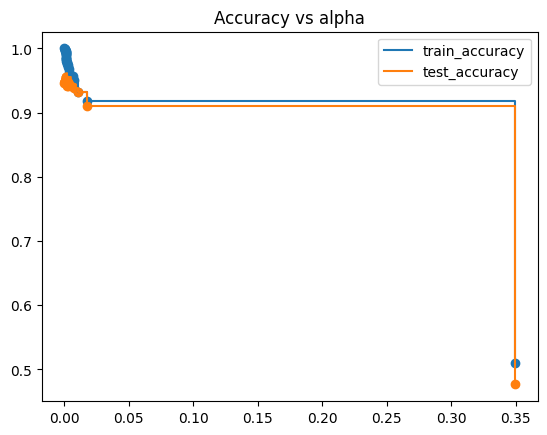

In [ ]:
# gráfica del accuracy en entramiento y prueba versus alpha
plt.scatter(ccp_alphas,accuracyTrain)
plt.scatter(ccp_alphas,accuracyTest)
plt.plot(ccp_alphas,accuracyTrain,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,accuracyTest,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

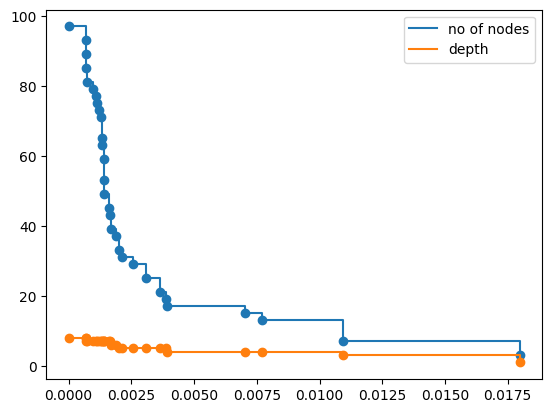

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

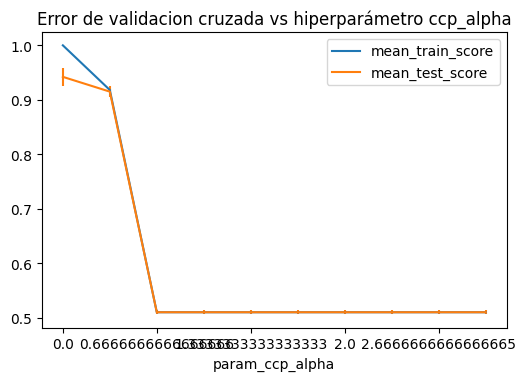

In [ ]:
# Post pruning (cost complexity pruning) por validación cruzada

# Valores de ccp_alpha evaluados
param_grid = {"ccp_alpha":np.linspace(0, 3, 10)}

Tree = DecisionTreeClassifier(max_depth         = None,     # continua hasta tener todos los nodos puros
                              min_samples_split = 2,        # número mínimo de muestras para hacer un split (defecto=2)
                              random_state      = 123)

# Búsqueda por validación cruzada
grid = GridSearchCV(estimator = Tree,                       # modelo de árboles
                    param_grid = param_grid,                # parámetro ccp
                    scoring    = 'accuracy',                # métrica
                    cv         = 10,                        # número de folds
                    return_train_score = True               # para que muestre resultados sonre el conjunto de entrenamiento
                    )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [ ]:
 #Estructura del árbol final
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 8
Número de nodos terminales: 49


In [ ]:
# Error de test del modelo final
predicciones = modelo_final.predict(X_test)
accuracy = accuracy_score(y_true    = y_test,
                          y_pred    = predicciones,
                          normalize = True
                          )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 94.66666666666667 %


# <FONT COLOR="green"> ** Conclusiones** </FONT>

Reporte algunas conclusiones sobre el desarrollo del trabajo.

Como principales conclusiones tenemos:



*  El modelo de regresión logística demostró ser el más eficaz en la clasificación del conjunto de datos empleado en esta actividad, alcanzando una precisión del 99%, en contraste con los modelos de árboles de decisión y KNN, los cuales obtuvieron precisión del 94.5% y 92%, respectivamente.
*  Mediante EDA pudimos encontrar algunas falencias en los datos y corregirlas para lograr mejores implementaciones en los modelos.
*   Podemos notar que aunque utilizamos metodos como la ccp y el gridSearch, no logramos mejoras radicales en nuestros modelos. estas no superaban el 1.5%, por lo cual podemos deducir que la mejor opción es optar por el modelo con un mejor desempeño inicial.
*   Herramientas como la curva ROC y el AUC nos permiten mostrar graficamente el desempeño de nuestro modelo y pueden ser de utilidad a la hora de decidirnos por un modelo en particular.






# <FONT COLOR="green"> ** Bibliografía** </FONT>

Reporte 2 referencias de consulta para realizar el trabajo

[1] Kulkarni, V. Y., & Sinha, P. K. (2012). Pruning of Random Forest classifiers: A survey and future directions. In 2012 International Conference on Data Science & Engineering (ICDSE) (pp. 64-68). Cochin, India. doi: 10.1109/ICDSE.2012.6282329.

[2] Bobadilla, J. (2021). Machine learning y deep learning: usando Python, Scikit y Keras. Ediciones de la U.

